# Data Analysis for the paper 'Cultivating mindfulness in a software company: impact in performance and psico-cognitive factors'
## To be published at EMSE
### Analysis by José Antonio Parejo Maestre japarejo@us.es

## Libraries import

In [1]:
import pandas as pd
import plot_likert as pl
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import seaborn as sns
from tableone import TableOne
import pingouin as pg
import numpy as np
import math
from datetime import datetime,timedelta

## Important Constants

In [2]:
# Dates of the mindfulness workshop:
mindfulnessStartDate=datetime(2019, 2, 25)
mindfulnessEndDate=datetime(2019,4,4)

# Dates of the PRE-workshop measured performance interval
preStartDate=datetime(2019,1,28)
preEndDate=datetime(2019,2,24)

# Dates of the POST-workshop measured performance interval
postStartDate=datetime(2019,3,18)
postEndDate=datetime(2019,4,14)

## Data Import

In [3]:
print("Loading development tasks data:")
developmentTasks = pd.read_csv("data/subjectsData/DevelopmentTasks.csv",sep=";")
developmentTasks

Loading development tasks data:


,Sujeto,Perfil,Grupo,Identificador,Tareas,#,Proyecto,Tipo,Creado,Actualizado,Inicio,Fin,Cerrada
0,46,desarrollo,EXP,46 EXP desarrollo,AD1a,19358,SICAL,TC-Error,26/04/2019 9:23,NaN,NaN,NaN,NaN
1,46,desarrollo,EXP,46 EXP desarrollo,AD1a,19323,SICAL,TC-Error,23/04/2019 11:54,NaN,NaN,NaN,NaN
2,46,desarrollo,EXP,46 EXP desarrollo,AD1a,19169,SICAL,TC-Error,05/04/2019 8:30,NaN,NaN,NaN,NaN
3,46,desarrollo,EXP,46 EXP desarrollo,AD1a,19159,SICAL,TC-Error,04/04/2019 9:29,NaN,NaN,NaN,NaN
4,46,desarrollo,EXP,46 EXP desarrollo,AD1a,19131,SICAL,TC-Error,02/04/2019 8:09,NaN,,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1791,7,desarrollo,EXP,7 EXP desarrollo,AD3,18258,NaN,TR-Gestión,08/01/2019 8:47,NaN,08/01/2019,NaN,26/02/2019 12:18
1792,7,desarrollo,EXP,7 EXP desarrollo,AD3,18239,NaN,TR-Gestión,27/12/2018 9:33,NaN,03/04/2019,NaN,05/04/2019 14:32
1793,7,desarrollo,EXP,7 EXP desarrollo,AD3,18210,NaN,TR-Error,17/12/2018 11:49,NaN,17/12/2018,NaN,14/02/2019 8:28
1794,7,desarrollo,EXP,7 EXP desarrollo,AD3,18182,NaN,TR-Gestión,12/12/2018 11:37,NaN,12/12/2018,NaN,21/02/2019 14:19


In [4]:
print("Loading support tasks data:")
supportTasks = pd.read_csv("data/subjectsData/SupportTasks.csv",sep=";")
supportTasks

Loading support tasks data:


,Sujeto,Perfil,Grupo,Identificador,ID,Título,Entidad,Estado,Última actualización,Fecha de apertura,...,Tiempo para resolver,Solicitante - Solicitante,Duración total,Descripción,Urgencia,Fecha de resolución,Fecha de cierre,Observador - Grupo de observación,Asignada a - Grupo técnico,Prioridad
0,9,Soporte,CTRL,9 CTRL Soporte,105 196,HACIENDA LOCAL,Entidad raíz > Ayuntamientos > Metropolitana >...,Resuelto,03/05/2019 11:37,03/05/2019 11:37,...,NaN,MUÑOZ AGUILAR YOLANDA,.5,CONSULTA HACIENDA LOCAL,Media,03/05/2019 11:37,NaN,CAU - Aplicaciones,Hacienda Local,Baja
1,9,Soporte,CTRL,9 CTRL Soporte,105 185,HACIENDA LOCAL,Entidad raíz > Ayuntamientos > Vega > Rinconad...,Resuelto,03/05/2019 9:43,03/05/2019 9:43,...,NaN,ESCUDERO BAÑEZ ANTONIO DANIEL,.5,CONSULTA HACIENDA LOCAL,Media,03/05/2019 9:43,NaN,CAU - Aplicaciones,Hacienda Local,Baja
2,9,Soporte,CTRL,9 CTRL Soporte,105 172,HACIENDA LOCAL,Entidad raíz > Ayuntamientos > Sierra Sur > Pe...,Resuelto,03/05/2019 8:38,03/05/2019 8:37,...,NaN,HUMANES MUÑOZ ANA,.5,CONSULTA HACIENDA LOCAL,Media,03/05/2019 8:38,NaN,CAU - Aplicaciones,Hacienda Local,Baja
3,9,Soporte,CTRL,9 CTRL Soporte,105 171,HACIENDA LOCAL,Entidad raíz > Ayuntamientos > Vega > Burguillos,Resuelto,03/05/2019 8:31,03/05/2019 8:30,...,NaN,SOLIS RAMIREZ EVA MARÍA,.5,CONSULTA HACIENDA LOCAL,Media,03/05/2019 8:31,NaN,CAU - Aplicaciones,Hacienda Local,Baja
4,9,Soporte,CTRL,9 CTRL Soporte,105 159,LICYTAL,Entidad raíz > Ayuntamientos > Campiña Morón >...,Resuelto,02/05/2019 14:03,02/05/2019 14:02,...,NaN,CRUZ ORTIZ ANTONIA,.5,CONSULTA LICYTAL,Media,02/05/2019 14:03,NaN,CAU - Aplicaciones,Licytal,Baja
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3276,29,Soporte,EXP,29 EXP Soporte,108 743,,,Resuelto,22/01/2019 9:01,21/01/2019 13:35,...,,,,,,,,,,Baja
3277,29,Soporte,EXP,29 EXP Soporte,108 740,,,Resuelto,22/01/2019 8:49,22/01/2019 8:40,...,,,,,,,,,,Baja
3278,29,Soporte,EXP,29 EXP Soporte,108 443,,,Resuelto,22/01/2019 8:40,22/01/2019 8:37,...,,,,,,,,,,Baja
3279,29,Soporte,EXP,29 EXP Soporte,108 735,,,Resuelto,22/01/2019 8:10,22/01/2019 8:07,...,,,,,,,,,,Baja


## Data Wrangling

### Develompment tasks

#### Renaming and date parsing

In [5]:
# Column renaming for translation from Spanish to English:
developmentTasks=developmentTasks.rename(columns={'Sujeto': 'ID',
                                          'Grupo': 'Group',
                                          'Creado':'Created',
                                          'Actualizado':'Updated',
                                          'Inicio':'Start',
                                          'Fin':'Finish',
                                          'Cerrada':'Closed',
                                          'Tipo':'Type',
                                          'Perfil':'Role'
                                          })
print(developmentTasks.columns)

def parseDate(row,column,formats):
    if type(row) != str:
        return row    
    #print(row)
    value=row
    for fmt in formats:
        try:
            value = datetime.strptime(row, fmt)
            break
        except ValueError:
            pass
        else:
            value = datetime.Na
    return value
    
        
formats=["%d/%m/%Y  %H:%M","%d/%m/%Y"]
# Conversion of columns to datetime:
developmentTasks['Created'] = developmentTasks['Created'].apply(lambda row: parseDate(row,'Created',formats))
developmentTasks['Updated'] = developmentTasks['Updated'].apply(lambda row: parseDate(row,'Updated',formats))
developmentTasks['Start'] = developmentTasks['Start'].apply(lambda row: parseDate(row,'Start',formats))
developmentTasks['Finish'] = developmentTasks['Finish'].apply(lambda row: parseDate(row,'Finish',formats))
developmentTasks['Closed'] = developmentTasks['Closed'].apply(lambda row: parseDate(row,'Closed',formats))

# Replacement of wrong Group specification (ctrl --> Ctrl)
developmentTasks['Group']=developmentTasks['Group'].replace('ctrl','Ctrl')
developmentTasks['Group']=developmentTasks['Group'].replace('CTRL','Ctrl')
developmentTasks

Index(['ID', 'Role', 'Group', 'Identificador', 'Tareas', '#', 'Proyecto',
       'Type', 'Created', 'Updated', 'Start', 'Finish', 'Closed'],
      dtype='object')


,ID,Role,Group,Identificador,Tareas,#,Proyecto,Type,Created,Updated,Start,Finish,Closed
0,46,desarrollo,EXP,46 EXP desarrollo,AD1a,19358,SICAL,TC-Error,2019-04-26 09:23:00,NaT,NaN,NaT,NaT
1,46,desarrollo,EXP,46 EXP desarrollo,AD1a,19323,SICAL,TC-Error,2019-04-23 11:54:00,NaT,NaN,NaT,NaT
2,46,desarrollo,EXP,46 EXP desarrollo,AD1a,19169,SICAL,TC-Error,2019-04-05 08:30:00,NaT,NaN,NaT,NaT
3,46,desarrollo,EXP,46 EXP desarrollo,AD1a,19159,SICAL,TC-Error,2019-04-04 09:29:00,NaT,NaN,NaT,NaT
4,46,desarrollo,EXP,46 EXP desarrollo,AD1a,19131,SICAL,TC-Error,2019-04-02 08:09:00,NaT,,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1791,7,desarrollo,EXP,7 EXP desarrollo,AD3,18258,NaN,TR-Gestión,2019-01-08 08:47:00,NaT,2019-01-08 00:00:00,NaT,2019-02-26 12:18:00
1792,7,desarrollo,EXP,7 EXP desarrollo,AD3,18239,NaN,TR-Gestión,2018-12-27 09:33:00,NaT,2019-04-03 00:00:00,NaT,2019-04-05 14:32:00
1793,7,desarrollo,EXP,7 EXP desarrollo,AD3,18210,NaN,TR-Error,2018-12-17 11:49:00,NaT,2018-12-17 00:00:00,NaT,2019-02-14 08:28:00
1794,7,desarrollo,EXP,7 EXP desarrollo,AD3,18182,NaN,TR-Gestión,2018-12-12 11:37:00,NaT,2018-12-12 00:00:00,NaT,2019-02-21 14:19:00


### Support tasks

#### Renaming and date parsing

In [6]:
supportTasks=supportTasks.rename(columns={'Sujeto': 'ID',
                                          'Grupo': 'Group',
                                          'Identificador':'taskID',
                                          'ID':'task',
                                          'Fecha de apertura':'Created',
                                          'Última actualización':'Updated',
                                          'Fecha de resolución':'Finish',
                                          'Fecha de cierre':'Closed',
                                          'Estado':'State',
                                          'Perfil':'Role',
                                          'Categoría':'Type',
                                          'Duración total':'RTTC'
                                          })

print(supportTasks.columns)

def parseDate(row,formats):
    #print(type(row))
    if type(row) != str:
        return row    
    #print(row)
    value=row
    for fmt in formats:
        try:
            value = datetime.strptime(row, fmt)
            break
        except ValueError:
            pass
        else:
            value = datetime.Na
    return value

def parseTime(row,timeformats):    
    print(row)
    print(type(row))
    if type(row) == pd.Timestamp:
        row=datetime(row)
    elif type(row) != str:
        return row
    value=row
    for fmt in timeformats:
        try:
            t = datetime.strptime(value,fmt)
            delta = timedelta(hours=t.hour, minutes=t.minute, seconds=t.second)
            value = delta.total_seconds()/3600.0
        except ValueError:
            pass
        else:
            value = np.NaN
    return value


formats=["%d/%m/%Y  %H:%M","%d/%m/%Y"]

supportTasks['Created'] = supportTasks['Created'].apply(lambda row: parseDate(row,formats))
supportTasks['Updated'] = supportTasks['Updated'].apply(lambda row: parseDate(row,formats))
#supportTasks['Start'] = supportTasks['Start'].apply(lambda row: parseDate(row,'Created',formats))
supportTasks['Finish'] = supportTasks['Finish'].apply(lambda row: parseDate(row,formats))
supportTasks['Closed'] = supportTasks['Closed'].apply(lambda row: parseDate(row,formats))

#timeformats=["%H:%M","%HH:%MM"]
#supportTasks['RTTC'] = supportTasks['RTTC'].apply(lambda row: parseTime(row,timeformats))

# Replacement of wrong Group specification (ctrl --> Ctrl)
supportTasks['Group']=supportTasks['Group'].replace('ctrl','Ctrl')
supportTasks['Group']=supportTasks['Group'].replace('CTRL','Ctrl')

supportTasks['RTTC']

Index(['ID', 'Role', 'Group', 'taskID', 'task', 'Título', 'Entidad', 'State',
       'Updated', 'Created', 'Type', 'Tiempo para resolver',
       'Solicitante - Solicitante', 'RTTC', 'Descripción', 'Urgencia',
       'Finish', 'Closed', 'Observador - Grupo de observación',
       'Asignada a - Grupo técnico', 'Prioridad'],
      dtype='object')


0       .5
1       .5
2       .5
3       .5
4       .5
        ..
3276      
3277      
3278      
3279      
3280      
Name: RTTC, Length: 3281, dtype: object

### Aggregated metrics generated for the different types of log events:

Etc: Error tasks created


NFtc: New Functionality tasks created

Itc: Improvement tasks created

Stc: Support tasks created

Mtc: Management tasks created

----

Etu: Error tasks updated

NFtu: New Functionality tasks updated

Itu: Improvement tasks updated

Stu: Support tasks updated

Mtu: Management tasks updated

----

Eta: Error tasks assigned

NFta: New Functionality tasks assigned

Ita: Improvement tasks assigned

Sta: Support tasks assigned

Mta: Management tasks assigned

----

Etd: Error tasks done

NFtd: New Functionality tasks done

Itd: Improvement tasks done

Std: Support tasks done

Mtd: Management tasks done

----

Etcl: Error tasks closed

NFcl: New Functionality closed

Itcl: Improvement tasks closed

Stcl: Support tasks closed

Mtcl: Management tasks closed


In [7]:
def isTaskBetween(row,start,finish,action):    
    #print(str(row[action]))
    if type(row[action]) == float or type(row[action]) == str:
        return False
    return start <= row[action] <= finish

def isTaskTypeBetween(row,start,finish,tasktype,action):
    #print(row['Type'])
    return (row['Type'] == tasktype) and (isTaskBetween(row,start,finish,action))

def moment(row):
    if row['isEtclPre'] or row['isNFtclPre'] or row['isItclPre'] or row['isStclPre'] or row['isMtclPre']:
        return 'PRE'
    elif row['isEtclPost'] or row['isNFtclPost'] or row['isItclPost'] or row['isStclPost'] or row['isMtclPost']:
        return 'POST'
    else:
        return np.NaN                    
    
developmentTasks['isEtcPre']=developmentTasks.apply(lambda row: isTaskTypeBetween(row,preStartDate,preEndDate,'TC-Error','Created'),axis=1)
developmentTasks['isEtcPost']=developmentTasks.apply(lambda row: isTaskTypeBetween(row,postStartDate,postEndDate,'TC-Error','Created'),axis=1)
developmentTasks['isNFtcPre']=developmentTasks.apply(lambda row: isTaskTypeBetween(row,postStartDate,postEndDate,'TC-Nueva Funcionalidad','Created'),axis=1) 
developmentTasks['isNFtcPost']=developmentTasks.apply(lambda row: isTaskTypeBetween(row,postStartDate,postEndDate,'TC-Nueva Funcionalidad','Created'),axis=1) 
developmentTasks['isItcPre']=developmentTasks.apply(lambda row: isTaskTypeBetween(row,postStartDate,postEndDate,'TC-Mejora','Created'),axis=1) 
developmentTasks['isItcPost']=developmentTasks.apply(lambda row: isTaskTypeBetween(row,postStartDate,postEndDate,'TC-Mejora','Created'),axis=1)
developmentTasks['isStcPre'] =developmentTasks.apply(lambda row: isTaskTypeBetween(row,preStartDate,preEndDate,'TC-Soporte','Created'),axis=1)
developmentTasks['isStcPost']=developmentTasks.apply(lambda row: isTaskTypeBetween(row,postStartDate,postEndDate,'TC-Soporte','Created'),axis=1)
developmentTasks['isMtcPre']=developmentTasks.apply(lambda row: isTaskTypeBetween(row,preStartDate,preEndDate,'TC-Gestión','Created'),axis=1)
developmentTasks['isMtcPost']=developmentTasks.apply(lambda row: isTaskTypeBetween(row,postStartDate,postEndDate,'TC-Gestión','Created'),axis=1)

                                                     
                                                     
developmentTasks['isEtuPre']=developmentTasks.apply(lambda row: isTaskTypeBetween(row,preStartDate,preEndDate,'TA-Error','Updated'),axis=1)
developmentTasks['isEtuPost']=developmentTasks.apply(lambda row: isTaskTypeBetween(row,postStartDate,postEndDate,'TA-Error','Updated'),axis=1)
developmentTasks['isNFtuPre']=developmentTasks.apply(lambda row: isTaskTypeBetween(row,postStartDate,postEndDate,'TA-Nueva Funcionalidad','Updated'),axis=1) 
developmentTasks['isNFtuPost']=developmentTasks.apply(lambda row: isTaskTypeBetween(row,postStartDate,postEndDate,'TA-Nueva Funcionalidad','Updated'),axis=1) 
developmentTasks['isItuPre']=developmentTasks.apply(lambda row: isTaskTypeBetween(row,postStartDate,postEndDate,'TA-Mejora','Updated'),axis=1) 
developmentTasks['isItuPost']=developmentTasks.apply(lambda row: isTaskTypeBetween(row,postStartDate,postEndDate,'TA-Mejora','Updated'),axis=1)
developmentTasks['isStuPre']=developmentTasks.apply(lambda row: isTaskTypeBetween(row,preStartDate,preEndDate,'TA-Soporte','Updated'),axis=1)
developmentTasks['isStuPost']=developmentTasks.apply(lambda row: isTaskTypeBetween(row,postStartDate,postEndDate,'TA-Soporte','Updated'),axis=1)
developmentTasks['isMtuPre']=developmentTasks.apply(lambda row: isTaskTypeBetween(row,preStartDate,preEndDate,'TA-Gestión','Updated'),axis=1)
developmentTasks['isMtuPost']=developmentTasks.apply(lambda row: isTaskTypeBetween(row,postStartDate,postEndDate,'TA-Gestión','Updated'),axis=1)
                                                     
developmentTasks['isEtaPre']=developmentTasks.apply(lambda row: isTaskTypeBetween(row,preStartDate,preEndDate,'TAS-Error','Start'),axis=1)
developmentTasks['isEtaPost']=developmentTasks.apply(lambda row: isTaskTypeBetween(row,postStartDate,postEndDate,'TAS-Error','Start'),axis=1)
developmentTasks['isNFtaPre']=developmentTasks.apply(lambda row: isTaskTypeBetween(row,postStartDate,postEndDate,'TAS-Nueva Funcionalidad','Start'),axis=1) 
developmentTasks['isNFtaPost']=developmentTasks.apply(lambda row: isTaskTypeBetween(row,postStartDate,postEndDate,'TAS-Nueva Funcionalidad','Start'),axis=1) 
developmentTasks['isItaPre']=developmentTasks.apply(lambda row: isTaskTypeBetween(row,postStartDate,postEndDate,'TAS-Mejora','Start'),axis=1) 
developmentTasks['isItaPost']=developmentTasks.apply(lambda row: isTaskTypeBetween(row,postStartDate,postEndDate,'TAS-Mejora','Start'),axis=1)
developmentTasks['isStaPre']=developmentTasks.apply(lambda row: isTaskTypeBetween(row,preStartDate,preEndDate,'TAS-Soporte','Start'),axis=1)
developmentTasks['isStaPost']=developmentTasks.apply(lambda row: isTaskTypeBetween(row,postStartDate,postEndDate,'TAS-Soporte','Start'),axis=1)
developmentTasks['isMtaPre']=developmentTasks.apply(lambda row: isTaskTypeBetween(row,preStartDate,preEndDate,'TAS-Gestión','Start'),axis=1)
developmentTasks['isMtaPost']=developmentTasks.apply(lambda row: isTaskTypeBetween(row,postStartDate,postEndDate,'TAS-Gestión','Start'),axis=1)

developmentTasks['isEtdPre']=developmentTasks.apply(lambda row: isTaskTypeBetween(row,preStartDate,preEndDate,'TR-Error','Finish'),axis=1)
developmentTasks['isEtdPost']=developmentTasks.apply(lambda row: isTaskTypeBetween(row,postStartDate,postEndDate,'TR-Error','Finish'),axis=1)
developmentTasks['isNFtdPre']=developmentTasks.apply(lambda row: isTaskTypeBetween(row,postStartDate,postEndDate,'TR-Nueva Funcionalidad','Finish'),axis=1) 
developmentTasks['isNFtdPost']=developmentTasks.apply(lambda row: isTaskTypeBetween(row,postStartDate,postEndDate,'TR-Nueva Funcionalidad','Finish'),axis=1) 
developmentTasks['isItdPre']=developmentTasks.apply(lambda row: isTaskTypeBetween(row,postStartDate,postEndDate,'TR-Mejora','Finish'),axis=1) 
developmentTasks['isItdPost']=developmentTasks.apply(lambda row: isTaskTypeBetween(row,postStartDate,postEndDate,'TR-Mejora','Finish'),axis=1)
developmentTasks['isStdPre']=developmentTasks.apply(lambda row: isTaskTypeBetween(row,preStartDate,preEndDate,'TR-Soporte','Finish'),axis=1)
developmentTasks['isStdPost']=developmentTasks.apply(lambda row: isTaskTypeBetween(row,postStartDate,postEndDate,'TR-Soporte','Finish'),axis=1)
developmentTasks['isMtdPre']=developmentTasks.apply(lambda row: isTaskTypeBetween(row,preStartDate,preEndDate,'TR-Gestión','Finish'),axis=1)
developmentTasks['isMtdPost']=developmentTasks.apply(lambda row: isTaskTypeBetween(row,postStartDate,postEndDate,'TR-Gestión','Finish'),axis=1)                                                                                                                                    

developmentTasks['isEtclPre']=developmentTasks.apply(lambda row: isTaskTypeBetween(row,preStartDate,preEndDate,'TR-Error','Closed'),axis=1)
developmentTasks['isEtclPost']=developmentTasks.apply(lambda row: isTaskTypeBetween(row,postStartDate,postEndDate,'TR-Error','Closed'),axis=1)
developmentTasks['isNFtclPre']=developmentTasks.apply(lambda row: isTaskTypeBetween(row,postStartDate,postEndDate,'TR-Nueva Funcionalidad','Closed'),axis=1) 
developmentTasks['isNFtclPost']=developmentTasks.apply(lambda row: isTaskTypeBetween(row,postStartDate,postEndDate,'TR-Nueva Funcionalidad','Closed'),axis=1) 
developmentTasks['isItclPre']=developmentTasks.apply(lambda row: isTaskTypeBetween(row,postStartDate,postEndDate,'TR-Mejora','Closed'),axis=1) 
developmentTasks['isItclPost']=developmentTasks.apply(lambda row: isTaskTypeBetween(row,postStartDate,postEndDate,'TR-Mejora','Closed'),axis=1)
developmentTasks['isStclPre']=developmentTasks.apply(lambda row: isTaskTypeBetween(row,preStartDate,preEndDate,'TR-Soporte','Closed'),axis=1)
developmentTasks['isStclPost']=developmentTasks.apply(lambda row: isTaskTypeBetween(row,postStartDate,postEndDate,'TR-Soporte','Closed'),axis=1)
developmentTasks['isMtclPre']=developmentTasks.apply(lambda row: isTaskTypeBetween(row,preStartDate,preEndDate,'TR-Gestión','Closed'),axis=1)
developmentTasks['isMtclPost']=developmentTasks.apply(lambda row: isTaskTypeBetween(row,postStartDate,postEndDate,'TR-Gestión','Closed'),axis=1)                                                                                                                                    

developmentTasks['MOMENT']=developmentTasks.apply(lambda row: moment(row),axis=1)

developmentTasks

,ID,Role,Group,Identificador,Tareas,#,Proyecto,Type,Created,Updated,...,isEtclPost,isNFtclPre,isNFtclPost,isItclPre,isItclPost,isStclPre,isStclPost,isMtclPre,isMtclPost,MOMENT
0,46,desarrollo,EXP,46 EXP desarrollo,AD1a,19358,SICAL,TC-Error,2019-04-26 09:23:00,NaT,...,False,False,False,False,False,False,False,False,False,NaN
1,46,desarrollo,EXP,46 EXP desarrollo,AD1a,19323,SICAL,TC-Error,2019-04-23 11:54:00,NaT,...,False,False,False,False,False,False,False,False,False,NaN
2,46,desarrollo,EXP,46 EXP desarrollo,AD1a,19169,SICAL,TC-Error,2019-04-05 08:30:00,NaT,...,False,False,False,False,False,False,False,False,False,NaN
3,46,desarrollo,EXP,46 EXP desarrollo,AD1a,19159,SICAL,TC-Error,2019-04-04 09:29:00,NaT,...,False,False,False,False,False,False,False,False,False,NaN
4,46,desarrollo,EXP,46 EXP desarrollo,AD1a,19131,SICAL,TC-Error,2019-04-02 08:09:00,NaT,...,False,False,False,False,False,False,False,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1791,7,desarrollo,EXP,7 EXP desarrollo,AD3,18258,NaN,TR-Gestión,2019-01-08 08:47:00,NaT,...,False,False,False,False,False,False,False,False,False,NaN
1792,7,desarrollo,EXP,7 EXP desarrollo,AD3,18239,NaN,TR-Gestión,2018-12-27 09:33:00,NaT,...,False,False,False,False,False,False,False,False,True,POST
1793,7,desarrollo,EXP,7 EXP desarrollo,AD3,18210,NaN,TR-Error,2018-12-17 11:49:00,NaT,...,False,False,False,False,False,False,False,False,False,PRE
1794,7,desarrollo,EXP,7 EXP desarrollo,AD3,18182,NaN,TR-Gestión,2018-12-12 11:37:00,NaT,...,False,False,False,False,False,False,False,True,False,PRE


## Aggregated Metrics Computation

### Development Tasks

In [8]:
columns=['isEtcPre','isEtcPost','isNFtcPre','isNFtcPost','isItcPre','isItcPost','isStcPre','isStcPost','isMtcPre','isMtcPost',
         'isEtuPre','isEtuPost','isNFtuPre','isNFtuPost','isItuPre','isItuPost','isStuPre','isStuPost','isMtuPre','isMtuPost',
         'isEtaPre','isEtaPost','isNFtaPre','isNFtaPost','isItaPre','isItaPost','isStaPre','isStaPost','isMtaPre','isMtaPost',
         'isEtdPre','isEtdPost','isNFtdPre','isNFtdPost','isItdPre','isItdPost','isStdPre','isStdPost','isMtdPre','isMtdPost',
         'isEtclPre','isEtclPost','isNFtclPre','isNFtclPost','isItclPre','isItclPost','isStclPre','isStclPost','isMtclPre','isMtclPost']
aggregatedDevelopmentTasks=developmentTasks.groupby(['ID', 'Group'])[columns].apply(lambda x : x.astype(int).sum())
aggregatedDevelopmentTasks['CreatedTasksPre']=aggregatedDevelopmentTasks.apply(lambda row: row['isEtcPre']+row['isNFtcPre']+row['isItcPre']+row['isStcPre']+row['isMtcPre'],axis=1)
aggregatedDevelopmentTasks['CreatedTasksPost']=aggregatedDevelopmentTasks.apply(lambda row: row['isEtcPost']+row['isNFtcPost']+row['isItcPost']+row['isStcPost']+row['isMtcPost'],axis=1)
aggregatedDevelopmentTasks['UpdatedTasksPre']=aggregatedDevelopmentTasks.apply(lambda row: row['isEtuPre']+row['isNFtuPre']+row['isItuPre']+row['isStuPre']+row['isMtuPre'],axis=1)
aggregatedDevelopmentTasks['UpdatedTasksPost']=aggregatedDevelopmentTasks.apply(lambda row: row['isEtuPost']+row['isNFtuPost']+row['isItuPost']+row['isStuPost']+row['isMtuPost'],axis=1)
aggregatedDevelopmentTasks['AssignedTasksPre']=aggregatedDevelopmentTasks.apply(lambda row: row['isEtaPre']+row['isNFtaPre']+row['isItaPre']+row['isStaPre']+row['isMtaPre'],axis=1)
aggregatedDevelopmentTasks['AssignedTasksPost']=aggregatedDevelopmentTasks.apply(lambda row: row['isEtaPost']+row['isNFtaPost']+row['isItaPost']+row['isStaPost']+row['isMtaPost'],axis=1)
aggregatedDevelopmentTasks['DoneTasksPre']=aggregatedDevelopmentTasks.apply(lambda row: row['isEtdPre']+row['isNFtdPre']+row['isItdPre']+row['isStdPre']+row['isMtdPre'],axis=1)
aggregatedDevelopmentTasks['DoneTasksPost']=aggregatedDevelopmentTasks.apply(lambda row: row['isEtdPost']+row['isNFtdPost']+row['isItdPost']+row['isStdPost']+row['isMtdPost'],axis=1)
aggregatedDevelopmentTasks['ClosedTasksPre']=aggregatedDevelopmentTasks.apply(lambda row: row['isEtclPre']+row['isNFtclPre']+row['isItclPre']+row['isStclPre']+row['isMtclPre'],axis=1)
aggregatedDevelopmentTasks['ClosedTasksPost']=aggregatedDevelopmentTasks.apply(lambda row: row['isEtclPost']+row['isNFtclPost']+row['isItclPost']+row['isStclPost']+row['isMtclPost'],axis=1)

aggregatedDevelopmentTasks['TasksPre']=aggregatedDevelopmentTasks.apply(lambda row: row['CreatedTasksPre']+row['UpdatedTasksPre']+row['AssignedTasksPre']+row['DoneTasksPre']+row['ClosedTasksPre'],axis=1)
aggregatedDevelopmentTasks['TasksPost']=aggregatedDevelopmentTasks.apply(lambda row: row['CreatedTasksPost']+row['UpdatedTasksPost']+row['AssignedTasksPost']+row['DoneTasksPost']+row['ClosedTasksPost'],axis=1)

aggregatedDevelopmentTasks

,,isEtcPre,isEtcPost,isNFtcPre,isNFtcPost,isItcPre,isItcPost,isStcPre,isStcPost,isMtcPre,isMtcPost,...,UpdatedTasksPre,UpdatedTasksPost,AssignedTasksPre,AssignedTasksPost,DoneTasksPre,DoneTasksPost,ClosedTasksPre,ClosedTasksPost,TasksPre,TasksPost
ID,Group,,,,,,,,,,,,,,,,,,,,,
3,Ctrl,2,3,0,0,0,0,0,0,7,9,...,8,18,0,0,0,0,5,9,22,39
7,EXP,7,0,2,2,0,0,0,0,3,0,...,23,49,0,0,0,0,21,22,56,73
8,Ctrl,0,10,1,1,1,1,0,0,0,0,...,0,6,0,0,0,0,0,0,2,18
16,EXP,0,0,0,0,0,0,0,0,23,19,...,30,10,0,0,0,0,0,0,53,29
25,Ctrl,1,9,3,3,4,4,0,0,0,0,...,10,14,0,0,0,0,8,14,26,44
26,Ctrl,0,0,0,0,0,0,0,0,0,0,...,6,13,0,0,0,0,6,15,12,28
28,Ctrl,0,1,0,0,0,0,0,0,0,1,...,3,1,0,0,0,0,1,1,4,4
30,Ctrl,5,0,1,1,0,0,0,0,28,24,...,43,103,0,0,0,0,7,10,84,138
32,EXP,3,2,0,0,4,4,1,0,2,3,...,11,5,0,0,0,0,3,0,24,14


In [9]:
aggregatedDevelopmentTasks.reset_index(inplace=True)
df=aggregatedDevelopmentTasks[['Group','ID','TasksPre','TasksPost']]
df

,Group,ID,TasksPre,TasksPost
0,Ctrl,3,22,39
1,EXP,7,56,73
2,Ctrl,8,2,18
3,EXP,16,53,29
4,Ctrl,25,26,44
5,Ctrl,26,12,28
6,Ctrl,28,4,4
7,Ctrl,30,84,138
8,EXP,32,24,14
9,EXP,46,19,21


Development Tasks


<Axes: title={'center': 'Tasks created, assigned, updated, done or closed by developers'}, xlabel='MOMENT', ylabel='TASKS'>

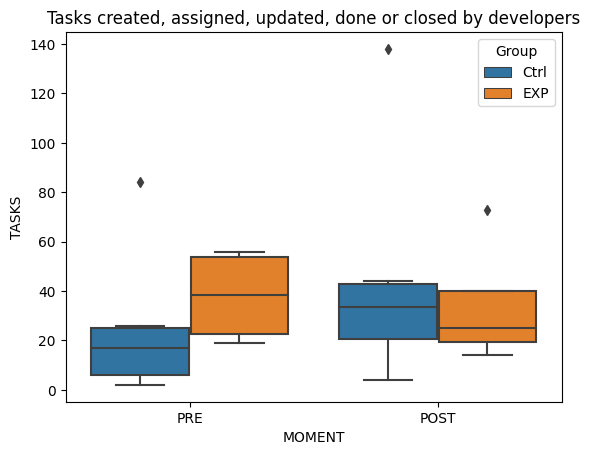

In [10]:
longADT=pd.melt(df,id_vars=['ID','Group'],value_vars=['TasksPre','TasksPost'])
longADT=longADT.rename(columns={"variable": "MOMENT", "value": "TASKS"})
longADT['MOMENT']=longADT['MOMENT'].replace('TasksPre','PRE')
longADT['MOMENT']=longADT['MOMENT'].replace('TasksPost','POST')
print('Development Tasks')
plot=sns.boxplot(data=longADT, x='MOMENT',y='TASKS',hue='Group')
plot.set(title='Tasks created, assigned, updated, done or closed by developers')
plot

Development Tasks done


<Axes: ylabel='Tasks Closed'>

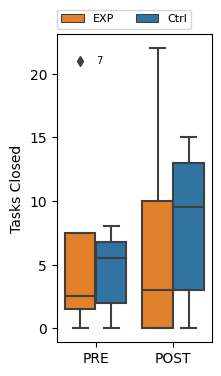

In [11]:
df=aggregatedDevelopmentTasks[['Group','ID','ClosedTasksPre','ClosedTasksPost']]
longADTDone=pd.melt(df,id_vars=['ID','Group'],value_vars=['ClosedTasksPre','ClosedTasksPost'])
longADTDone=longADTDone.rename(columns={"variable": "MOMENT", "value": "TASKS DONE"})
longADTDone['MOMENT']=longADTDone['MOMENT'].replace('ClosedTasksPre','PRE')
longADTDone['MOMENT']=longADTDone['MOMENT'].replace('ClosedTasksPost','POST')
vq1=longADTDone.groupby(['MOMENT','Group']).quantile(0.25)
oq1=longADTDone.groupby(['MOMENT','Group']).quantile(0.25)['TASKS DONE'].to_numpy()
q1 = np.array([oq1[2],oq1[3],oq1[0],oq1[1]])
oq3 = longADTDone.groupby(['MOMENT','Group']).quantile(0.75)['TASKS DONE'].to_numpy()
q3 = np.array([oq3[2],oq3[3],oq3[0],oq3[1]])
outlier_top_lim = q3 + 1.5 * (q3 - q1)
outlier_bottom_lim = q1 - 1.5 * (q3 - q1)



print('Development Tasks done')
fig, ax = plt.subplots(figsize=(2, 4))
hue_order=["EXP","Ctrl"]
palette = {
    'EXP': 'tab:orange',
    'Ctrl': 'tab:blue'
}

plot=sns.boxplot(data=longADTDone, x='MOMENT',y='TASKS DONE',hue='Group',ax=ax,hue_order=hue_order,palette=palette)
for row in longADTDone.itertuples():        
    val = row[-1]    
    identifier = row[1]
    index=(row.MOMENT=='POST')*2+(row.Group=='Ctrl')
    xdisp=0.1
    
    if (val > outlier_top_lim[index] or val < outlier_bottom_lim[index]):
        plt.text(index/4.0+xdisp, val, f' {identifier}', ha='right', va='center',fontsize=7)
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(10)
ax.xaxis.set_label_text('')
ax.yaxis.set_label_text('Tasks Closed')


ax.legend(bbox_to_anchor=(0.0, 1.0, 0.5, .08),loc='upper left',ncol=3, borderaxespad=0.,prop={'size': 8})
#plot.set(title='Tasks done closed by developers')
figureFileName = 'figures/developmentTasks-Done-boxplot.png'
plt.savefig(figureFileName,bbox_inches='tight',dpi=300)
plot

### Support Tasks

In [12]:
supportTasks['isCreatedPre']=supportTasks.apply(lambda row: isTaskBetween(row,preStartDate,preEndDate,'Created'),axis=1)
supportTasks['isUpdatedPre']=supportTasks.apply(lambda row: isTaskBetween(row,preStartDate,preEndDate,'Updated'),axis=1)
supportTasks['isFinishedPre']=supportTasks.apply(lambda row: isTaskBetween(row,preStartDate,preEndDate,'Finish'),axis=1)
supportTasks['isClosedPre']=supportTasks.apply(lambda row: isTaskBetween(row,preStartDate,preEndDate,'Updated'),axis=1)

supportTasks['isCreatedPost']=supportTasks.apply(lambda row: isTaskBetween(row,postStartDate,postEndDate,'Created'),axis=1)
supportTasks['isUpdatedPost']=supportTasks.apply(lambda row: isTaskBetween(row,postStartDate,postEndDate,'Updated'),axis=1)
supportTasks['isFinishedPost']=supportTasks.apply(lambda row: isTaskBetween(row,postStartDate,postEndDate,'Finish'),axis=1)
supportTasks['isClosedPost']=supportTasks.apply(lambda row: isTaskBetween(row,postStartDate,postEndDate,'Updated'),axis=1)

def computeMomentSupport(row):
    if row['isClosedPost']:
        return 'POST'
    elif row['isClosedPre']:
        return 'PRE'
    else:
        return np.NaN

supportTasks['MOMENT']=supportTasks.apply(lambda row: computeMomentSupport(row),axis=1)
supportTasks

,ID,Role,Group,taskID,task,Título,Entidad,State,Updated,Created,...,Prioridad,isCreatedPre,isUpdatedPre,isFinishedPre,isClosedPre,isCreatedPost,isUpdatedPost,isFinishedPost,isClosedPost,MOMENT
0,9,Soporte,Ctrl,9 CTRL Soporte,105 196,HACIENDA LOCAL,Entidad raíz > Ayuntamientos > Metropolitana >...,Resuelto,2019-05-03 11:37:00,2019-05-03 11:37:00,...,Baja,False,False,False,False,False,False,False,False,NaN
1,9,Soporte,Ctrl,9 CTRL Soporte,105 185,HACIENDA LOCAL,Entidad raíz > Ayuntamientos > Vega > Rinconad...,Resuelto,2019-05-03 09:43:00,2019-05-03 09:43:00,...,Baja,False,False,False,False,False,False,False,False,NaN
2,9,Soporte,Ctrl,9 CTRL Soporte,105 172,HACIENDA LOCAL,Entidad raíz > Ayuntamientos > Sierra Sur > Pe...,Resuelto,2019-05-03 08:38:00,2019-05-03 08:37:00,...,Baja,False,False,False,False,False,False,False,False,NaN
3,9,Soporte,Ctrl,9 CTRL Soporte,105 171,HACIENDA LOCAL,Entidad raíz > Ayuntamientos > Vega > Burguillos,Resuelto,2019-05-03 08:31:00,2019-05-03 08:30:00,...,Baja,False,False,False,False,False,False,False,False,NaN
4,9,Soporte,Ctrl,9 CTRL Soporte,105 159,LICYTAL,Entidad raíz > Ayuntamientos > Campiña Morón >...,Resuelto,2019-05-02 14:03:00,2019-05-02 14:02:00,...,Baja,False,False,False,False,False,False,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3276,29,Soporte,EXP,29 EXP Soporte,108 743,,,Resuelto,2019-01-22 09:01:00,2019-01-21 13:35:00,...,Baja,False,False,False,False,False,False,False,False,NaN
3277,29,Soporte,EXP,29 EXP Soporte,108 740,,,Resuelto,2019-01-22 08:49:00,2019-01-22 08:40:00,...,Baja,False,False,False,False,False,False,False,False,NaN
3278,29,Soporte,EXP,29 EXP Soporte,108 443,,,Resuelto,2019-01-22 08:40:00,2019-01-22 08:37:00,...,Baja,False,False,False,False,False,False,False,False,NaN
3279,29,Soporte,EXP,29 EXP Soporte,108 735,,,Resuelto,2019-01-22 08:10:00,2019-01-22 08:07:00,...,Baja,False,False,False,False,False,False,False,False,NaN


In [13]:
columns=['isCreatedPre','isUpdatedPre','isFinishedPre','isClosedPre','isCreatedPost','isUpdatedPost','isFinishedPost','isClosedPost']
aggregatedSupportTasks=supportTasks.groupby(['ID', 'Group'])[columns].apply(lambda x : x.astype(int).sum())
aggregatedSupportTasks['TasksPre']=aggregatedSupportTasks.apply(lambda row: row['isCreatedPre']+row['isUpdatedPre']+row['isFinishedPre']+row['isClosedPre'],axis=1)
aggregatedSupportTasks['TasksPost']=aggregatedSupportTasks.apply(lambda row: row['isCreatedPost']+row['isUpdatedPost']+row['isFinishedPost']+row['isClosedPost'],axis=1)

aggregatedSupportTasks

,,isCreatedPre,isUpdatedPre,isFinishedPre,isClosedPre,isCreatedPost,isUpdatedPost,isFinishedPost,isClosedPost,TasksPre,TasksPost
ID,Group,,,,,,,,,,
9,Ctrl,87,86,86,86,26,26,26,26,345,104
10,EXP,88,86,86,86,46,47,47,47,346,187
12,Ctrl,129,18,18,18,91,218,223,218,183,750
18,Ctrl,139,127,138,127,122,122,122,122,531,488
29,EXP,275,255,0,255,290,291,0,291,785,872
33,Ctrl,87,72,72,72,62,65,65,65,303,257
36,EXP,152,135,148,135,110,122,111,122,570,465
44,EXP,101,52,52,52,90,125,125,125,257,465


Support Tasks


<Axes: title={'center': 'Tasks created, assigned, updated, done or closed by the support team'}, xlabel='MOMENT', ylabel='TASKS'>

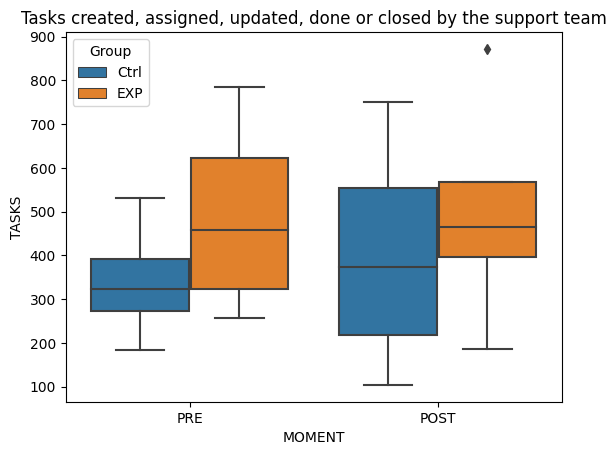

In [14]:
aggregatedSupportTasks.reset_index(inplace=True)
longAST=pd.melt(aggregatedSupportTasks,id_vars=['ID','Group'],value_vars=['TasksPre','TasksPost'])
longAST=longAST.rename(columns={"variable": "MOMENT", "value": "TASKS"})
longAST['MOMENT']=longAST['MOMENT'].replace('TasksPre','PRE')
longAST['MOMENT']=longAST['MOMENT'].replace('TasksPost','POST')
print('Support Tasks')
plot=sns.boxplot(data=longAST, x='MOMENT',y='TASKS',hue='Group')
plot.set(title='Tasks created, assigned, updated, done or closed by the support team')
figureFileName = 'figures/suportTasks-boxplot.png'
plt.savefig(figureFileName,bbox_inches='tight',dpi=300)
plot

    ID Group MOMENT  TASKS DONE
0    9  Ctrl    PRE          86
1   10   EXP    PRE          86
2   12  Ctrl    PRE          18
3   18  Ctrl    PRE         138
4   29   EXP    PRE           0
5   33  Ctrl    PRE          72
6   36   EXP    PRE         148
7   44   EXP    PRE          52
8    9  Ctrl   POST          26
9   10   EXP   POST          47
10  12  Ctrl   POST         223
11  18  Ctrl   POST         122
12  29   EXP   POST           0
13  33  Ctrl   POST          65
14  36   EXP   POST         111
15  44   EXP   POST         125
Support Tasks


<Axes: ylabel='Tasks Closed'>

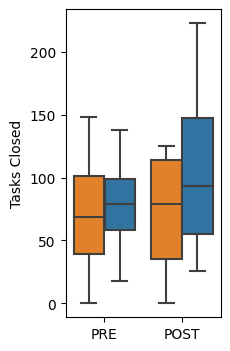

In [15]:
longASTDone=pd.melt(aggregatedSupportTasks,id_vars=['ID','Group'],value_vars=['isFinishedPre','isFinishedPost'])
longASTDone=longASTDone.rename(columns={"variable": "MOMENT", "value": "TASKS DONE"})
longASTDone['MOMENT']=longASTDone['MOMENT'].replace('isFinishedPre','PRE')
longASTDone['MOMENT']=longASTDone['MOMENT'].replace('isFinishedPost','POST')
print(longASTDone)
print('Support Tasks')
fig, ax = plt.subplots(figsize=(2, 4))
hue_order=["EXP","Ctrl"]
palette = {
    'EXP': 'tab:orange',
    'Ctrl': 'tab:blue'
}
plot=sns.boxplot(data=longASTDone, x='MOMENT',y='TASKS DONE',hue='Group',ax=ax,hue_order=hue_order,palette=palette)
plot.yaxis.set_label_text('Tasks Closed')
plot.xaxis.set_label_text('')
plt.legend([], [], frameon=False)
#plot.set(title='Tasks done or closed by the support team')
figureFileName = 'figures/suportTasks-Done-boxplot.png'
plt.savefig(figureFileName,bbox_inches='tight',dpi=300)
plot

## Null Hypothesis Statstical tests

### Development tasks

In [16]:
anovaTable=pg.mixed_anova(dv='TASKS DONE', between='Group', within='MOMENT', subject='ID', data=longADTDone.dropna())
print("ANOVA Mixed for development tasks done:")
anovaTable

ANOVA Mixed for development tasks done:


,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Group,0.833333,1,8,0.833333,0.008109,0.930463,0.001013,NaN
1,MOMENT,28.800000,1,8,28.800000,5.337452,0.049666,0.400185,1.0
2,Interaction,12.033333,1,8,12.033333,2.230116,0.173695,0.217995,NaN


#### ANOVA premises:

**Homoscedasticity**:

In [17]:
pg.homoscedasticity(data=longADTDone.loc[longADTDone['MOMENT']=='PRE'].dropna(), 
                    dv='TASKS DONE', 
                    group='Group').round(2)

,W,pval,equal_var
levene,0.69,0.43,True


In [18]:
pg.homoscedasticity(data=longADTDone.loc[longADTDone['MOMENT']=='POST'].dropna(), 
                    dv='TASKS DONE', 
                    group='Group').round(2)

,W,pval,equal_var
levene,0.34,0.58,True


**Sphericity / Normality:**

The sphericity normality tests is included in the eps anova column provided above, thus there is no need to perform additional checkings.

### Support tasks

In [19]:
anovaTable=pg.mixed_anova(dv='TASKS DONE', between='Group', within='MOMENT', subject='ID', data=longASTDone.dropna())
print("Anova mixed for tasks done by the support team")
anovaTable

Anova mixed for tasks done by the support team


,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Group,2047.5625,1,6,2047.5625,0.476845,0.515665,0.073623,NaN
1,MOMENT,885.0625,1,6,885.0625,0.210622,0.662436,0.033913,1.0
2,Interaction,976.5625,1,6,976.5625,0.232396,0.646834,0.037288,NaN


#### ANOVA premises:

**Homoscedasticity**:

In [20]:
pg.homoscedasticity(data=longASTDone.loc[longASTDone['MOMENT']=='PRE'].dropna(), 
                    dv='TASKS DONE', 
                    group='Group').round(2)

,W,pval,equal_var
levene,0.28,0.61,True


In [21]:
pg.homoscedasticity(data=longASTDone.loc[longASTDone['MOMENT']=='POST'].dropna(), 
                    dv='TASKS DONE', 
                    group='Group').round(2)

,W,pval,equal_var
levene,0.38,0.56,True


**Sphericity / Normality:**

The sphericity normality tests is included in the eps anova column provided above, thus there is no need to perform additional checkings.

### Data export for analysis with JASP

In [22]:
longAST['dept']='support'
longADT['dept']='development'

data=pd.concat([longADT,longAST])


dataPre=data.loc[data['MOMENT']=='PRE']
dataPre['TasksPRE']=dataPre['TASKS']
dataPost=data.loc[data['MOMENT']=='POST']
dataPost['TasksPOST']=dataPost['TASKS']
wideData=pd.merge(dataPre[['ID','Group','TasksPRE','dept']],
                                     dataPost[['ID','TasksPOST']],on='ID')
wideData['DeptAsNumeric']=wideData['dept']
wideData['DeptAsNumeric']=wideData['DeptAsNumeric'].replace({'development':0,'support':1})

wideData.to_csv('data/IntegratedPerformanceDataForJASP.csv')

anovaTable=pg.mixed_anova(dv='TASKS', between='Group', within='MOMENT', subject='ID', data=data.dropna())
print("ANOVA Mixed for all the tasks interactions performed by individuals of both deparments (created, assigned, updagted,finished, and closed):")
anovaTable

ANOVA Mixed for all the tasks interactions performed by individuals of both deparments (created, assigned, updagted,finished, and closed):


C:\Users\japarejo\AppData\Local\Temp\ipykernel_34716\927799774.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataPre['TasksPRE']=dataPre['TASKS']
C:\Users\japarejo\AppData\Local\Temp\ipykernel_34716\927799774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataPost['TasksPOST']=dataPost['TASKS']


,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Group,81323.755556,1,16,81323.755556,0.694718,0.416834,0.041613,NaN
1,MOMENT,3885.444444,1,16,3885.444444,0.268636,0.611342,0.016512,1.0
2,Interaction,2538.755556,1,16,2538.755556,0.175527,0.680816,0.010851,NaN


### Intregrated data from both departments

#### Tasks Closed

In [23]:
longASTDone['dept']='support'
longADTDone['dept']='development'
longADTDone['MOMENT']=longADTDone['MOMENT'].replace({'ClosedTasksPre':'PRE','ClosedTasksPost':'POST'})



dataDone=pd.concat([longADTDone,longASTDone])

dataDonePre=dataDone.loc[dataDone['MOMENT']=='PRE']



dataDonePre['TasksPRE']=dataDonePre['TASKS DONE']
dataDonePost=dataDone.loc[dataDone['MOMENT']=='POST']
dataDonePost['TasksPOST']=dataDonePost['TASKS DONE']
wideDataDone=pd.merge(dataDonePre[['ID','Group','TasksPRE','dept']],
                                     dataDonePost[['ID','TasksPOST']],on='ID')
wideDataDone['DeptAsNumeric']=wideDataDone['dept']
wideDataDone['DeptAsNumeric']=wideDataDone['DeptAsNumeric'].replace({'development':0,'support':1})

wideDataDone.to_csv('data/IntegratedPerformanceDataDoneForJASP.csv')

anovaTable=pg.mixed_anova(dv='TASKS DONE', between='Group', within='MOMENT', subject='ID', data=dataDone.dropna())
print("ANOVA Mixed for all the tasks performed by individuals of both deparments (closed):")
anovaTable

ANOVA Mixed for all the tasks performed by individuals of both deparments (closed):


C:\Users\japarejo\AppData\Local\Temp\ipykernel_34716\2350716344.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataDonePre['TasksPRE']=dataDonePre['TASKS DONE']
C:\Users\japarejo\AppData\Local\Temp\ipykernel_34716\2350716344.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataDonePost['TasksPOST']=dataDonePost['TASKS DONE']


,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Group,49.612500,1,16,49.612500,0.009942,0.921813,0.000621,NaN
1,MOMENT,568.027778,1,16,568.027778,0.347928,0.563526,0.021283,1.0
2,Interaction,468.834722,1,16,468.834722,0.287170,0.599411,0.017632,NaN


#### ANOVA premises:

**Homoscedasticity**:

In [24]:
pg.homoscedasticity(data=dataDone.loc[dataDone['MOMENT']=='PRE'].dropna(), 
                    dv='TASKS DONE', 
                    group='Group').round(2)

,W,pval,equal_var
levene,0.12,0.73,True


In [25]:
pg.homoscedasticity(data=dataDone.loc[dataDone['MOMENT']=='POST'].dropna(), 
                    dv='TASKS DONE', 
                    group='Group').round(2)

,W,pval,equal_var
levene,0.03,0.88,True


**Sphericity / Normality:**

The sphericity normality tests is included in the eps anova column provided above, thus there is no need to perform additional checkings.